In [2]:
import shap
import mlflow
import mlflow.sklearn
import pandas as pd

# Charger le modèle depuis MLflow Model Registry
mlflow.set_tracking_uri("http://localhost:5000")
model_name = "Best_Model_RandomForestRegressor" 
model = mlflow.sklearn.load_model(f"models:/{model_name}/latest")

# Charger les données d'entraînement pour calculer les SHAP values
data_path = "../data"
X_train = pd.read_csv("../data/X_train.csv")

C:\Users\mrach\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\mrach\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mlflow\store\artifact\utils\models.py:31: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  latest = client.get_latest_versions(name, None if stage is None else [stage])
C:\Users\mrach\AppData\Local\Packages\PythonSoftwareFoundation.

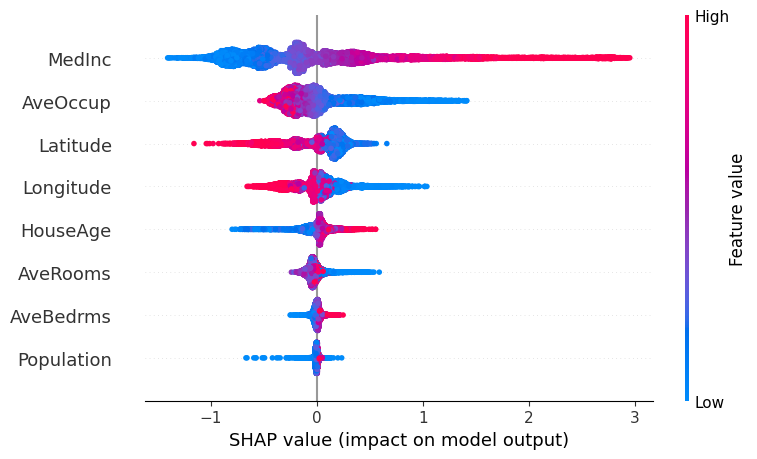

In [3]:
# Initialiser le SHAP Explainer pour un modèle RandomForest
explainer = shap.TreeExplainer(model)

# Calculer les valeurs SHAP pour l'ensemble de données d'entraînement
shap_values = explainer.shap_values(X_train)

# Résumé des valeurs SHAP pour l'ensemble des features
shap.summary_plot(shap_values, X_train)

In [4]:
shap.initjs()  # Initialisation de la visualisation interactive
shap.force_plot(explainer.expected_value[0], shap_values[0], X_train.iloc[0])

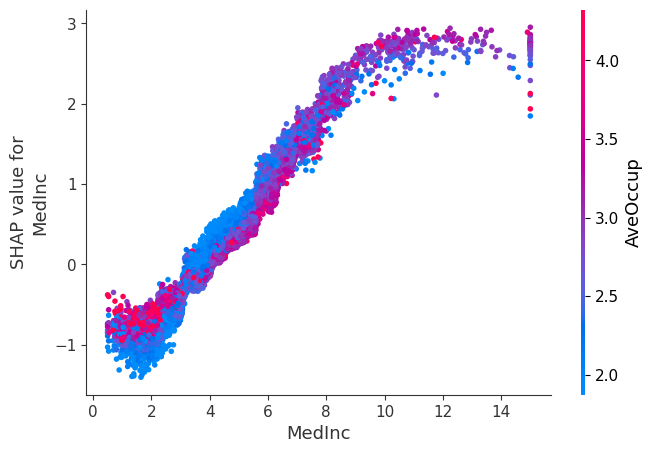

In [5]:
# Visualisation de la dépendance de la feature 'MedInc' avec les valeurs SHAP
shap.dependence_plot("MedInc", shap_values, X_train)